In [1]:
%matplotlib ipympl

import sys
sys.path.append('../')


from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from helper import extract_embeddings

In [2]:
sbert_explained_variance_95 = {
    "alfred": 165,
    "scout": 194,
    "rt1": 27,
    "bridge": 115,
    "tacoplay": 31
}

In [3]:
model_name = "all-mpnet-base-v2" # sbert
dataset_name = "scout"

results_fp = f"/home/slwanna/neural-feature-extraction/neural_feature_extraction/notebooks/results/01_{model_name}_{dataset_name}"

embeddings = extract_embeddings(f"{results_fp}.csv")

data = np.array(embeddings)

data.shape

(23249, 768)

/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extract

Text(0, 0.5, 'SSE')

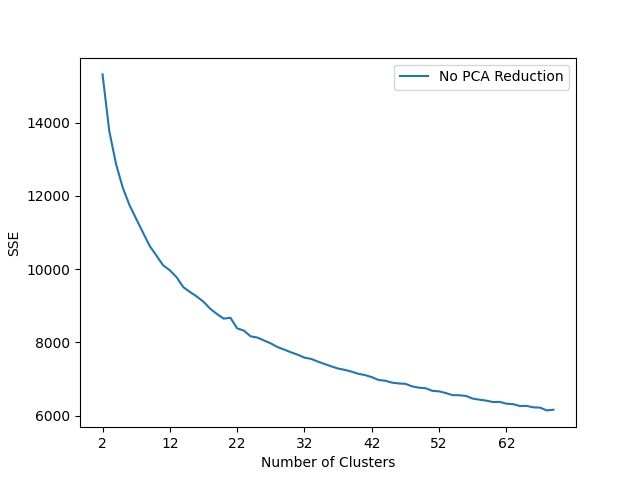

In [4]:
sse = []
k_start = 2
k_end = 70
clusters_range = range(k_start, k_end)

for k in clusters_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# visualize results
plt.plot(clusters_range, sse,  label='No PCA Reduction')
plt.legend()
plt.xticks(np.arange(k_start, k_end, step=10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")

/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/slwanna/miniconda3/envs/neural-feature-extract

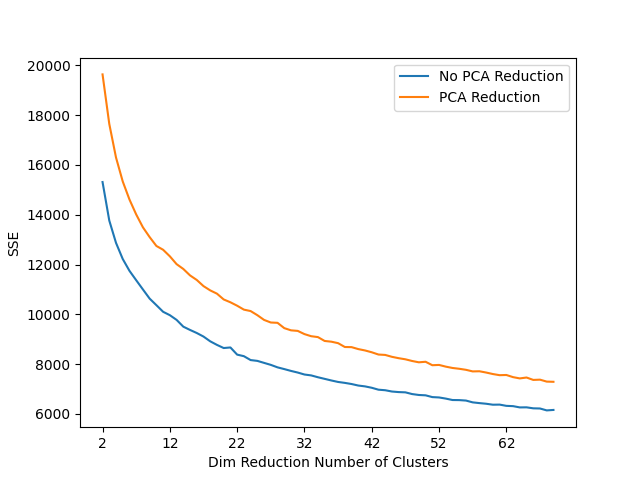

In [5]:
data = np.array(embeddings)
pca=PCA(n_components=sbert_explained_variance_95[dataset_name])
dim_reduced_embeddings = pca.fit_transform(data)

sse = []
X_dim_red = normalize(dim_reduced_embeddings, norm='l2')
k_start = 2
k_end = 70
clusters_range = range(k_start, k_end)

for k in clusters_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_dim_red)
    sse.append(kmeans.inertia_)

# visualize results
plt.plot(clusters_range, sse, label='PCA Reduction')
plt.legend()

plt.xticks(np.arange(k_start, k_end, step=10))
plt.xlabel("Dim Reduction Number of Clusters")
plt.ylabel("SSE")
plt.show()

/home/slwanna/miniconda3/envs/neural-feature-extraction/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


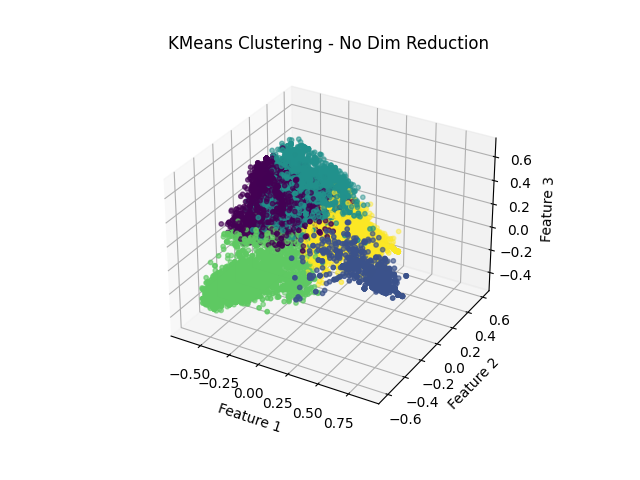

In [7]:
# Fit KMeans with n clusters
N_CLUSTERS = 5

kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(embeddings)

# Get cluster centers and labels for each point
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters
ax.scatter(X_dim_red[:, 0], X_dim_red[:, 1], X_dim_red[:, 2], c=labels, s=10, cmap='viridis')

# Plot the centroids
ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=75, alpha=0.75, marker='x')

# Set plot title and labels
ax.set_title('KMeans Clustering - No Dim Reduction')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Show the plot
plt.show()

In [10]:
original_df = pd.read_csv(f"{results_fp}.csv")
original_df["kmeans_labels"] = labels

In [12]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23249 entries, 0 to 23248
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      23249 non-null  int64 
 1   nl_command_exs  23249 non-null  object
 2   embedding       23249 non-null  object
 3   kmeans_labels   23249 non-null  int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 635.8+ KB


In [15]:
original_df.groupby('kmeans_labels')['nl_command_exs'].value_counts(normalize=True).groupby(level=0).head(5)

kmeans_labels  nl_command_exs                 
0              move forward                       0.050067
               move forward five feet             0.046319
               move forward three feet            0.035341
               move forward two feet              0.031593
               move forward ten feet              0.021419
1              take a picture                     0.348814
               and take a picture                 0.139526
               take a photo                       0.060594
               take picture                       0.044648
               and take a photo                   0.039864
2              go through the doorway             0.020930
               so how many doorways were there    0.015504
               how many doorways were there       0.015116
               go to the next doorway             0.006589
               move to the next doorway           0.006589
3              turn left ninety degrees           0.029714
         

In [16]:
original_df.groupby('kmeans_labels')['nl_command_exs'].value_counts().groupby(level=0).head(5)

kmeans_labels  nl_command_exs                 
0              move forward                        187
               move forward five feet              173
               move forward three feet             132
               move forward two feet               118
               move forward ten feet                80
1              take a picture                     1750
               and take a picture                  700
               take a photo                        304
               take picture                        224
               and take a photo                    200
2              go through the doorway               54
               so how many doorways were there      40
               how many doorways were there         39
               go to the next doorway               17
               move to the next doorway             17
3              turn left ninety degrees            165
               turn right                          160
               tur